In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='toi5671'

See also https://github.com/dfm/linear-models/blob/main/Figure.ipynb

In [3]:
from pathlib import Path
from astropy.io import fits


files = list(Path('.').glob('*.fits'))
files

[PosixPath('tess-s0050-2-2_211.009466_38.618266_50x50_astrocut.fits'),
 PosixPath('tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits'),
 PosixPath('tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits')]

In [6]:
files[0].name.split('-')

['tess', 's0050', '2', '2_211.009466_38.618266_50x50_astrocut.fits']

In [11]:
tpfs = {}
for f in files:
    tpf = fits.getdata(f)
    hdr = fits.getheader(f)
    sec = hdr['SECTOR']
    tpfs[sec] = tpf

In [20]:
tpf['FLUX'].shape

(1121, 50, 50)

In [33]:
tpf['FLUX'].sum((1,2)).shape

(1121,)

In [32]:
tpf['TIME'].shape

(1121,)

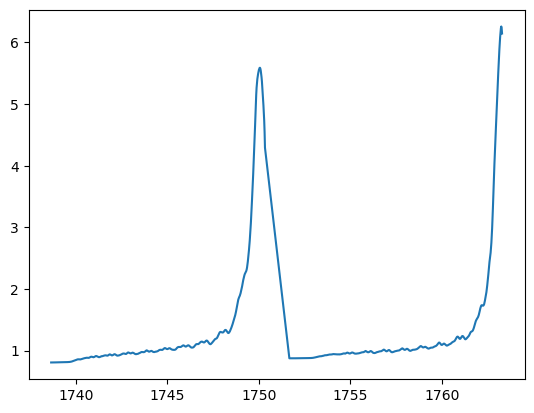

In [59]:
import matplotlib.pyplot as pl
import numpy as np

time = tpf['TIME']
tflux = tpf['FLUX'].sum((1,2))
pl.plot(time, tflux/np.median(tflux))

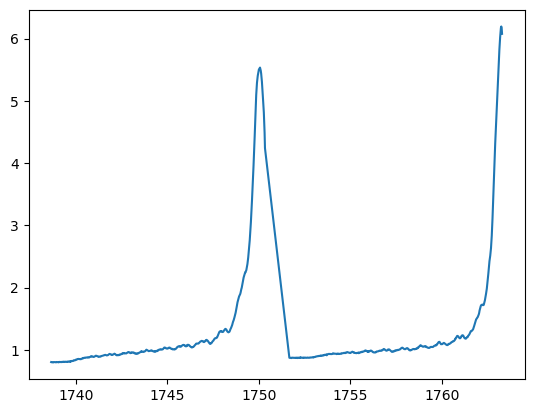

In [61]:
#pixel lightcurve
flux1 = tpf['FLUX'][:,0,0]
pl.plot(time, flux1/np.median(flux1))

In [52]:
X.reshape((1121,-1)).shape

(1121, 2500)

## Linear model

In [88]:
X = tpf['FLUX'][:,20:30,20:30].reshape((1121,-1))
tflux = tpf['FLUX'].sum((1,2))
weights = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, tflux))
model = np.dot(X, weights)

In [ ]:
# Plot it
fig = pl.figure(figsize = (18,5))
# pl.plot(time, model)
pl.plot(time, tflux - model, 'k.-', alpha = 0.35, ms = 3, lw = 1);

## PCA

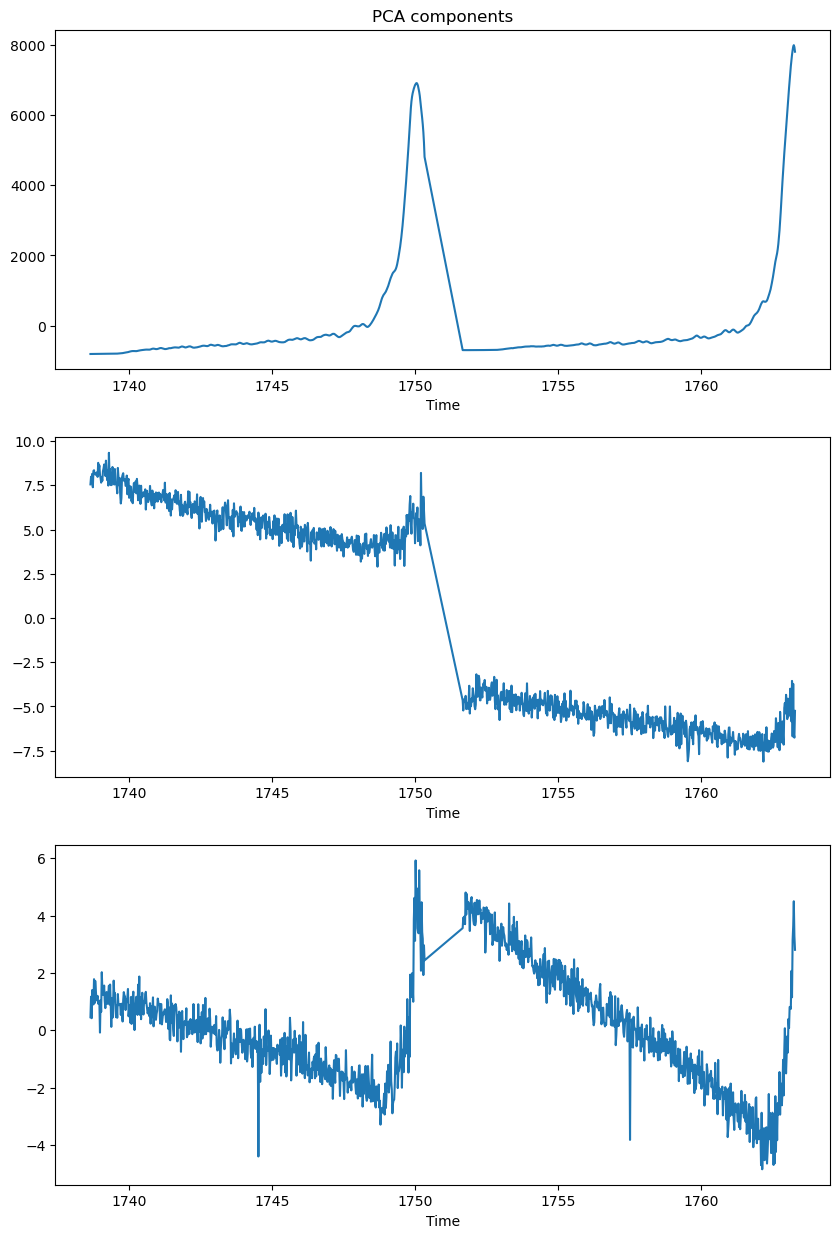

In [85]:
#dimensionality reduction
from sklearn.decomposition import FastICA, PCA


pca = PCA(n_components=3, svd_solver='randomized')
H = pca.fit_transform(X) 

fig, axs = pl.subplots(3, figsize=(10,15))

for ax,s in zip(axs, H.T):
    ax.plot(time, s)
    ax.set_xlabel('Time')
axs[0].set_title('PCA components');

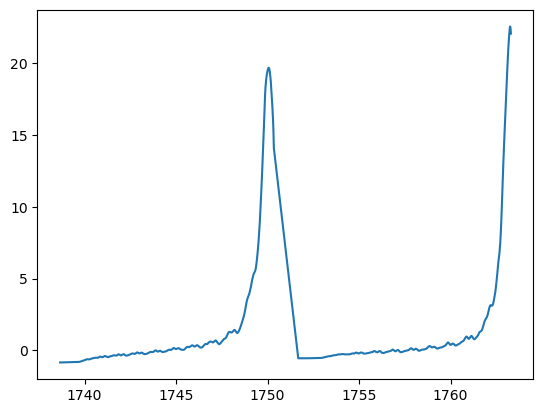

In [80]:
tflux_norm = tflux/np.median(tflux)
i = 0
c1 = H.T[i]/np.median(H.T[i])
pl.plot(time,tflux_norm-c1)

## ICA

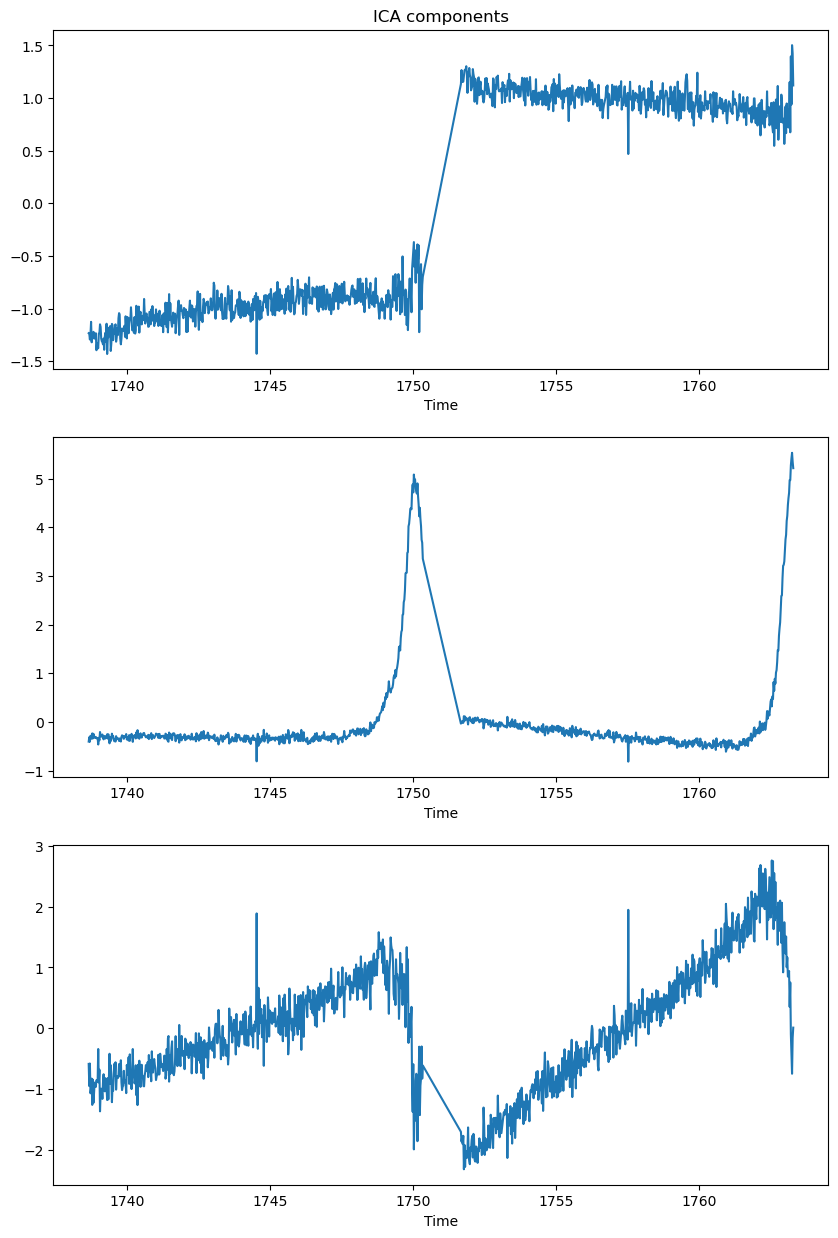

In [83]:
from sklearn.decomposition import FastICA, PCA

X = tpf['FLUX'][:,20:30,20:30].reshape((1121,-1))
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

fig, axs = pl.subplots(3, figsize=(10,15))

for ax,s in zip(axs, S_.T):
    ax.plot(time, s)
    ax.set_xlabel('Time')
axs[0].set_title('ICA components');